<a href="https://colab.research.google.com/github/RachelYZ/Deep-Learning-python/blob/master/deep_learning_with_sk_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Setting up
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [12]:
iris = datasets.load_iris()

#EDA
type(iris.data),type(iris.target)
iris.data.shape

numpy.ndarray

In [15]:
X = iris.data 
Y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


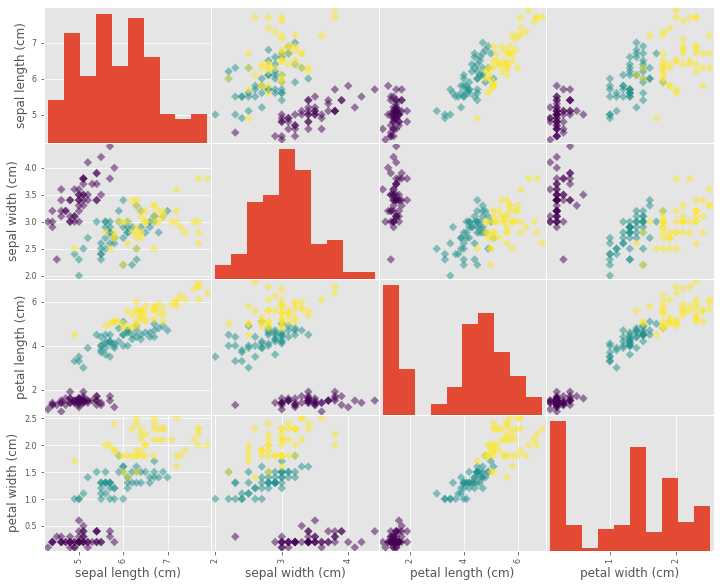

In [20]:
#Visual EDA
veda = pd.plotting.scatter_matrix(df, c=Y, figsize=[12,10], marker='D')

K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'],iris['target'])  
#requires pd.dataframe, no missing values

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [30]:
from google.colab import files
congress = files.upload()

Saving 114_congress.csv to 114_congress (1).csv


In [51]:
congress = pd.read_csv('114_congress.csv')
congress.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
y = congress['party'].values
X = congress.drop(['name', 'party', 'state'], axis=1).values
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
y_pred = knn.predict(X)
print(y_pred)

['R' 'R' 'D' 'R' 'D' 'D' 'R' 'D' 'R' 'D' 'D' 'R' 'D' 'R' 'D' 'D' 'D' 'R'
 'R' 'R' 'R' 'D' 'R' 'R' 'R' 'R' 'R' 'R' 'D' 'D' 'R' 'R' 'D' 'R' 'R' 'D'
 'R' 'D' 'R' 'R' 'R' 'D' 'D' 'R' 'D' 'R' 'R' 'R' 'R' 'D' 'D' 'R' 'D' 'R'
 'D' 'R' 'D' 'D' 'R' 'D' 'R' 'D' 'D' 'D' 'R' 'R' 'D' 'D' 'D' 'R' 'R' 'D'
 'R' 'D' 'R' 'R' 'R' 'R' 'R' 'D' 'R' 'D' 'D' 'R' 'R' 'D' 'R' 'D' 'R' 'D'
 'R' 'R' 'R' 'D' 'R' 'D' 'D' 'D' 'R' 'D']


In [0]:
#Measuring model performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))